In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


data = None
with open('Москва_2021.txt') as file:
    data = [int(line.rstrip()) for line in file]


In [106]:
def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_avg(data: list):
    return sum(data) / len(data)


def count_avg(data: list):
    return sum(data) / len(data)

def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_var_coef(data):
    return count_sko(data) / count_mathematical_expectation(data)

def count_moda(data):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    max_val = max(num_of_occurrences, key=num_of_occurrences.get)
    max_val_freq = num_of_occurrences[max_val] / len(data)

    return [max_val, num_of_occurrences[max_val], len(data)]

def count_razmax(data):
    return max(data) - min(data)

def find_second_max_and_min(data):

    sorted_data = sorted(set(data))
    
    return sorted_data[1], sorted_data[-2]

def find_k_momentum(data: list, k: int):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    mat_exp = count_mathematical_expectation(data)

    momentum = 0

    for val in num_of_occurrences:
        momentum += (val - mat_exp) ** k * (num_of_occurrences[val] / len(data))
    
    return momentum

def count_asymmetry(data):
    return find_k_momentum(data, 3) / (count_sko(data) ** 3)

def count_excess(data):
    return find_k_momentum(data, 4) / (count_sko(data) ** 4) - 3


def count_median(data):
    if len(data) % 2 == 1:
        m = (len(data)-1) // 2
        return sorted(data)[m+1]
    else:
        m = len(data) // 2
        return (sorted(data)[m] + sorted(data)[m+1])/2


def count_frequencies(data):
    num_of_occurrences = {}

    for val in data:
            if val not in num_of_occurrences:
                num_of_occurrences[val] = 1
            else:
                num_of_occurrences[val] += 1 

    return num_of_occurrences

1. По критерию Пирсона при уровне значимости α = 0,05 проверить
нулевую гипотезу о нормальном распределении:

а) случайной величины «возраст». Для этого разбить массив исходных
данных на 7 групп с равными интервалами (концы интервала –
целые).

б) случайной величины «средний возраст», используя выборку
средних, полученную в лабораторной работе №2.

a)

In [107]:
def choose_n_elems(data_source: list, n: int):
    res = []

    for _ in range(n):
        chosen_elem = np.random.choice(data_source)
        res.append(chosen_elem)
        data_source.remove(chosen_elem)
    
    return res

In [108]:
import copy
from typing import List


def find_samples():
    data_copy = copy.deepcopy(data)

    all_samples = []
    sample_len = math.floor(len(data_copy)/7)

    for _ in range(7):
        all_samples.append(choose_n_elems(data_copy, sample_len))

    return all_samples


def check_samples_have_same_borders(samples: List[List[int]]):
    min_border = None
    max_border = None
    
    borders_are_same = True

    for sample in samples:
        if not min_border:
            min_border = min(sample)

        if not max_border:
            max_border = max(sample)

        if min(sample) != min_border:
            borders_are_same = False
            return borders_are_same

        if max(sample) != max_border:
            borders_are_same = False
            return borders_are_same

        return borders_are_same


samples_are_ok = False

while not samples_are_ok:
    all_samples = find_samples()
    
    if not check_samples_have_same_borders(all_samples):
        samples_are_ok = False
        break
    else:
        samples_are_ok = True



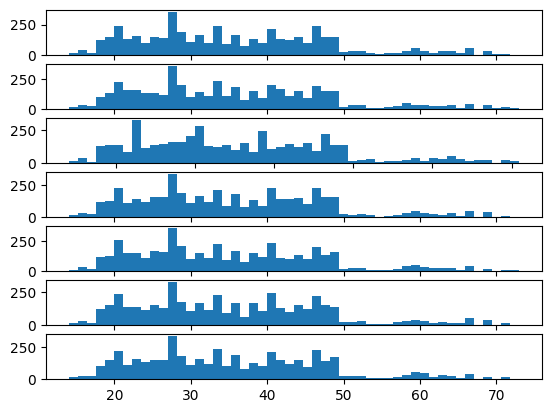

In [109]:
fig, axs = plt.subplots(7)

for sample_id in range(7):
    axs[sample_id].hist(all_samples[sample_id], bins=50)

In [110]:
def gauss_func(x):
    return 1 / ((2 * math.pi) ** 0.5) * math.e ** ( - (x) ** 2 / (2) )


def count_theoretical_frequencies(data: list, empyric_freqs: dict=None):
    avg = count_avg(data)
    # disp = count_dispersion(data)
    sko = count_sko(data)
    n = len(data)
    h = 1

    freqs = {}

    # empyric_freqs_sum = 0
    # for freqa in empyric_freqs:
    #     empyric_freqs_sum += empyric_freqs[freqa]

    for val in data:
        freqs[val] = h * n / sko * gauss_func((val - avg)/sko)

    return freqs

In [114]:
# уровень значимости
a = 0.05

for sample in all_samples:
    #  Вычислим теоретические частоты
    theoretical_freqs = count_theoretical_frequencies(sample )
    sample_freqs = count_frequencies(sample )
    # Найдём критическое значение  критерия согласия Пирсона

    k = len(sample) - 2 - 1 # это колво степеней свободы

    pirson = 0
    for val in theoretical_freqs:
        pirson += ((sample_freqs[val] - theoretical_freqs[val]) ** 2) / theoretical_freqs[val]

    print(pirson) 


4628
1478.3521553729172
4628
1591.301401805631
4628
1375.3015887292918
4628
1585.2056525281716
4628
1344.2103071287524
4628
1613.0706978518533
4628
1333.5054237326765
